In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
from scipy.integrate import odeint

-1.0 1.2246467991473532e-16


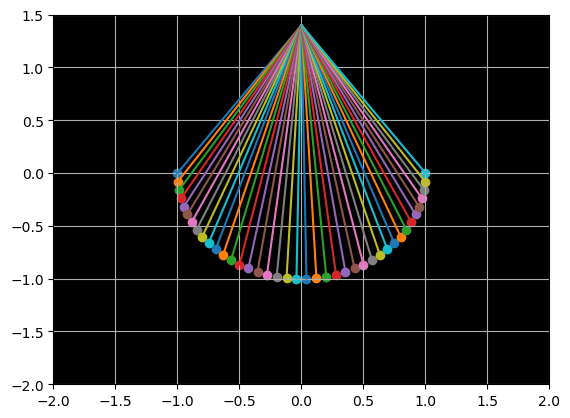

In [10]:
# in the linear case, there are simple functions that are the result of initial conditions
# these are easy to plot (and animate)

# i'd like to display a pendulum in 2D with a string drawn to its fixed point

fig = plt.figure()
ax = plt.axes()

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 1.5)
ax.grid()
ax.set_facecolor('black')
#fig.show() 

# initial condition
# we'll talk about changes in phi but will plot x and y

def getXandY(phi):
    x = np.cos(phi)
    y = np.sin(phi)
    return x, y

x, y = getXandY(np.pi)

print(x, y)

#ax.scatter(x, y)

# to see if this works
angles = np.linspace(np.pi, 2*np.pi, 40)
for phi in angles:
    x, y = getXandY(phi)
    #print (x, y)
    ax.scatter(x, y)
    # i also want to draw the string
    plt.plot([x, 0], [y, 1.4])
    # YAY
    
# cool. so we can talk about phi and see how it results in changes in the x-y plane.

In [21]:
# redefining the figure
fig = plt.figure()
ax = plt.axes()

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 1.5)
ax.grid()
ax.set_facecolor('black')

# the outer function is what lets us pass our data
def linearPendulum(x_array, y_array, nframes):
    marker1, = ax.plot([], "o", color = 'w')
    line1, = ax.plot([], color = 'maroon')

    def animateLinear(frame_num):
        x = x_array[frame_num]
        y = y_array[frame_num]

        marker1.set_data([y],[-x])
        line1.set_data([y, 0],[-x, 0])
        return

    anim = FuncAnimation(fig, animateLinear, frames=nframes, interval=100)
    display(HTML(anim.to_jshtml()))
    plt.close()

# our simulation is done external to the animation
nframes = 200
tmax = 5
t_array = np.linspace(0,tmax,nframes)

g = 9.8
l = 1
omega = np.sqrt(g / l)
# phi is simulated
phi = (np.pi / 2 ) * np.sin((3 * np.pi / 2) * omega * t_array)
#print(phi)

x_array, y_array = getXandY(phi)
linearPendulum(x_array, y_array, nframes)


In [ ]:
# honestly idk what i was really doing up there but now i'm going to try to simulate the pendulum 
# using the scipy.integrate.odeint numerical solver...

#solutions = odeint(ode_system, (-2,0,0,-0.4,2,0,0,0.4), t_array, args=(mlist,))

# as input, most significantly, this takes a function defining the ode system
# for the linear pendulum, ...
# nonlinearly, ...
